<a href="https://colab.research.google.com/github/vmpreciado/NETS3120/blob/main/Intro2NetworkX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Welcome to this Notebook, part of the NETS-3120 series, where we embark on an exploratory journey through NetworkX, a powerful Python library designed for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

In [ ]:
pip install networkx  # Install NetworkX using pip

In this section, drawn from Section II.C of our course, we dive into the practical aspects of using NetworkX. We'll begin by constructing and manipulating simple network structures and gradually progress to more complex graph operations.

In [ ]:
import networkx as nx  # Import the networkx library
G = nx.Graph()         # Create an empty undirected graph G
G.add_edge('1', '2')   # Add an edge between nodes 'A' and 'B'
print(G.nodes)         # Print the list (in square brackets) of nodes in the graph
print(G.edges)         # Print the list (in square brackets) of edges (2-tuples in parenthesis) in the graph

['1', '2']
[('1', '2')]


Let's expand our graph by adding more edges. By doing so, we can observe how the graph evolves with each addition, providing us with insight into the dynamic nature of network connections.

In [ ]:
G.add_edges_from([('2', '3'), ('3', '4'), ('4', '1'), ('1', '1')]) # The names of the nodes do not have to be numbers, can be any 'string'
print(G.nodes)         # Print the list of nodes in the graph
print(G.edges)         # Print the list of edges (2-tuples) in the graph

['1', '2', '3', '4']
[('1', '2'), ('1', '4'), ('1', '1'), ('2', '3'), ('3', '4')]


Visual representation is key to understanding network structures. Let's render our graph 'G' using NetworkX's visualization capabilities to get a clearer picture of its structure.

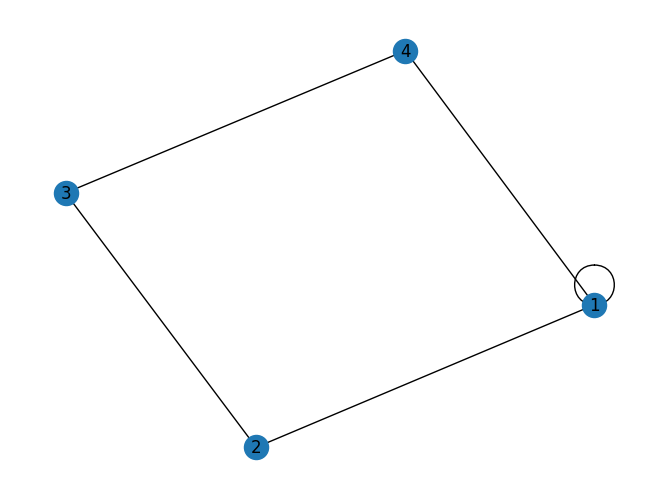

In [ ]:
import matplotlib.pyplot as plt  # Import the Matplotlib library's pyplot module
nx.draw(G, with_labels=True)     # Use NetworkX to draw the graph 'G' with node labels
plt.show()                       # Display the plot created using Matplotlib

NetworkX offers a variety of layout options for graph visualization. We'll load the Zachary Karate Club graph, a classic example in social network analysis, and experiment with different layouts to understand how each one provides unique perspectives on the graph's structure.


In [ ]:
# Load the Zachary's Karate Club graph from the NetworkX library of preloaded graph
G = nx.karate_club_graph()

First, let's visualize the Zachary graph using a random layout. This approach places nodes randomly, offering a unique and sometimes chaotic view of the network's structure.

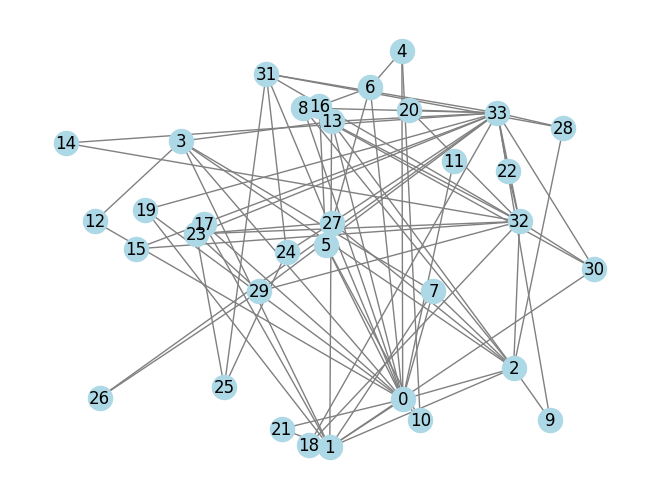

In [ ]:
# Draw the undirected graph using a random layout (nodes locate at random on the plane)
pos = nx.random_layout(G)  # positions for all nodes placed randomly
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray')
plt.show()  # Show the plot

Another interesting visualization is the circular layout, which arranges the nodes in a circle. This layout can help us observe patterns and clusters within the network that might not be apparent in other layouts.

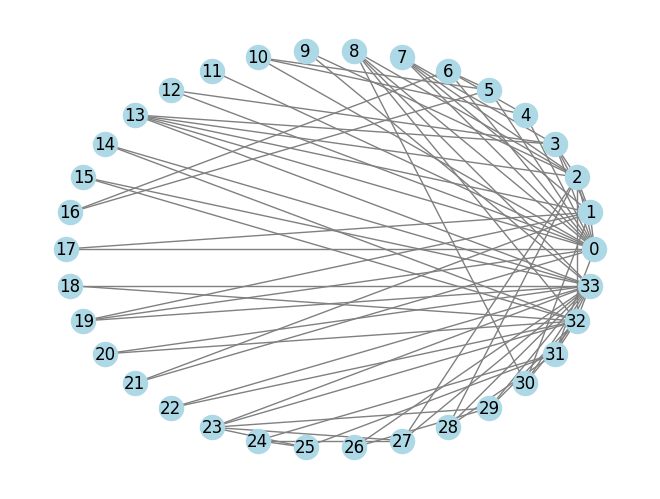

In [ ]:
# Draw the graph using a circular layout
pos = nx.circular_layout(G)  # positions for all nodes in a circle
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray')
plt.show()  # Show the plot

The spectral layout uses eigenvectors of the graph's Laplacian matrix to position the nodes (to be covered later in the course). It's particularly useful for highlighting the graph's community structure and other underlying patterns.

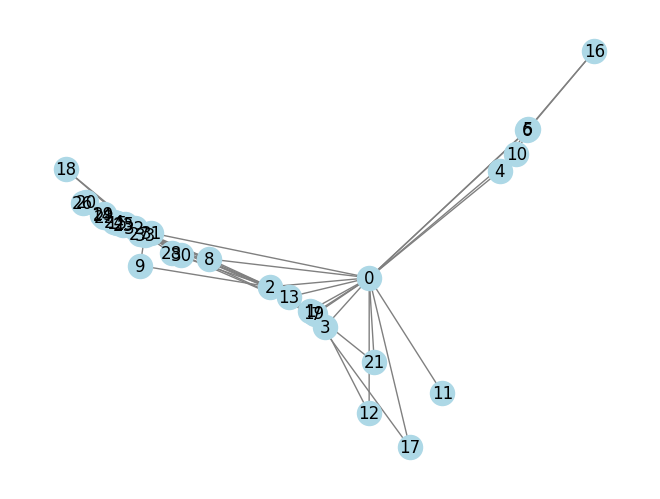

In [ ]:
# Draw the graph using a spectral layout (based on spectral embeddings--to be covered later in the course)
pos = nx.spectral_layout(G)  # positions for all nodes using the spectral layout
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray')
plt.show()  # Show the plot

Finally, we'll employ the spring layout, which positions nodes using a force-directed approach, simulating attractive and repulsive forces among them. This layout often results in aesthetically pleasing and intuitively understandable representations of networks.

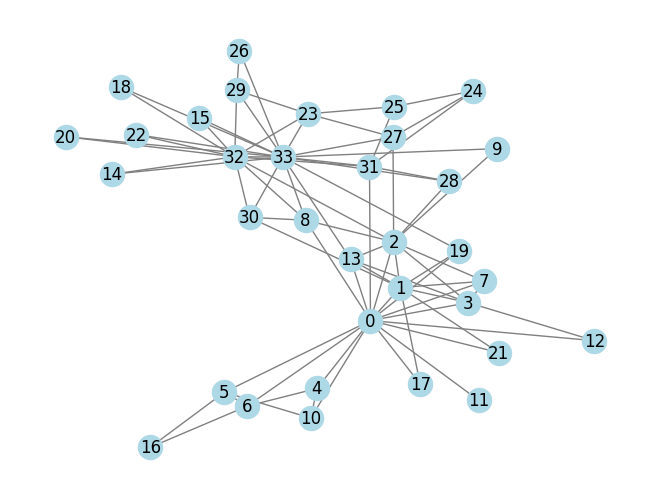

In [ ]:
# Draw the graph using the spring layout
pos = nx.spring_layout(G)  # positions for all nodes based on the physics of masses (nodes) connected by springs (edges)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray')
plt.show()  # Show the plot

Let's delve into different graph representations, starting with the edge list (LoE). This simple yet powerful representation lists all edges of the graph, providing a clear view of the connections between nodes.

In [ ]:
# Get the list of edges of the graph G
edges = list(G.edges()) # This call the 'edges' method in the graph object 'G'. Then it convertes it into a list for easy visualization
print(edges)  # Print the edges

[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 2), (1, 3), (1, 7), (1, 13), (1, 17), (1, 19), (1, 21), (1, 30), (2, 3), (2, 7), (2, 8), (2, 9), (2, 13), (2, 27), (2, 28), (2, 32), (3, 7), (3, 12), (3, 13), (4, 6), (4, 10), (5, 6), (5, 10), (5, 16), (6, 16), (8, 30), (8, 32), (8, 33), (9, 33), (13, 33), (14, 32), (14, 33), (15, 32), (15, 33), (18, 32), (18, 33), (19, 33), (20, 32), (20, 33), (22, 32), (22, 33), (23, 25), (23, 27), (23, 29), (23, 32), (23, 33), (24, 25), (24, 27), (24, 31), (25, 31), (26, 29), (26, 33), (27, 33), (28, 31), (28, 33), (29, 32), (29, 33), (30, 32), (30, 33), (31, 32), (31, 33), (32, 33)]


In our graph, nodes are labeled with natural numbers, starting at 0, following Python's indexing convention. This is an important detail to remember, as the first node is labeled '0', not '1' or '0' as a string.

The adjacency list is an efficient way to represent graphs, especially those that are large and sparse. It lists for each node its neighboring nodes, making it easy to traverse and understand the graph's connections.

In [ ]:
# Get the adjacency list of the graph, which shows each node's neighboring nodes
adjacency_list = G.adjacency() # This calls the 'adjacency' method on the object 'G'

# You can access the list of neighbors of a particular node as indicated below
target_node = 0 # Define the node for which you want to see the adjacent nodes
neighbours = G[target_node] # Directly access the adjacency list for the target node
print(f"{target_node}: {list(neighbours)}")

0: [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 17, 19, 21, 31]


To explore the entire adjacency structure of our graph, we can iterate over it using a for loop. This approach gives us a comprehensive view of how each node is connected within the network.

In [ ]:
# Iterate and print each node with its list of adjacent (neighboring) nodes
for node, neighbours in adjacency_list:
    print(f"{node}: {list(neighbours)}")

0: [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 17, 19, 21, 31]
1: [0, 2, 3, 7, 13, 17, 19, 21, 30]
2: [0, 1, 3, 7, 8, 9, 13, 27, 28, 32]
3: [0, 1, 2, 7, 12, 13]
4: [0, 6, 10]
5: [0, 6, 10, 16]
6: [0, 4, 5, 16]
7: [0, 1, 2, 3]
8: [0, 2, 30, 32, 33]
9: [2, 33]
10: [0, 4, 5]
11: [0]
12: [0, 3]
13: [0, 1, 2, 3, 33]
14: [32, 33]
15: [32, 33]
16: [5, 6]
17: [0, 1]
18: [32, 33]
19: [0, 1, 33]
20: [32, 33]
21: [0, 1]
22: [32, 33]
23: [25, 27, 29, 32, 33]
24: [25, 27, 31]
25: [23, 24, 31]
26: [29, 33]
27: [2, 23, 24, 33]
28: [2, 31, 33]
29: [23, 26, 32, 33]
30: [1, 8, 32, 33]
31: [0, 24, 25, 28, 32, 33]
32: [2, 8, 14, 15, 18, 20, 22, 23, 29, 30, 31, 33]
33: [8, 9, 13, 14, 15, 18, 19, 20, 23, 26, 27, 28, 29, 30, 31, 32, 22]


The adjacency matrix offers a different perspective. Here, we visualize it, with blue squares indicating the presence of an edge ('1'). Notice the matrix's symmetry along the main diagonal, a characteristic feature of undirected graphs.

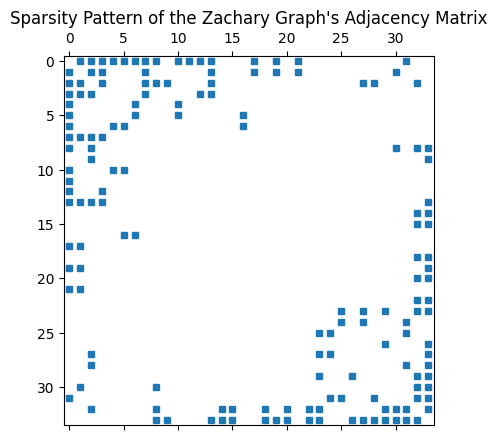

In [ ]:
import numpy as np

# Get the adjacency matrix (an array) as a sparse matrix
adj_matrix = nx.adjacency_matrix(G)

# Use Matplotlib's spy function to plot the sparsity pattern of the adjacency matrix
plt.spy(adj_matrix, markersize=5)
plt.title("Sparsity Pattern of the Zachary Graph's Adjacency Matrix")
plt.show()

The symmetric pattern of the adjacency matrix reflects the undirected nature of the graph. Each blue square corresponds to a connection between nodes. Next, we'll shift our focus to directed graphs and explore how their representation differs.

NetworkX is not just limited to undirected graphs; it adeptly handles directed graphs as well. Let's construct a small directed graph (digraph) with 4 nodes to explore this functionality further.

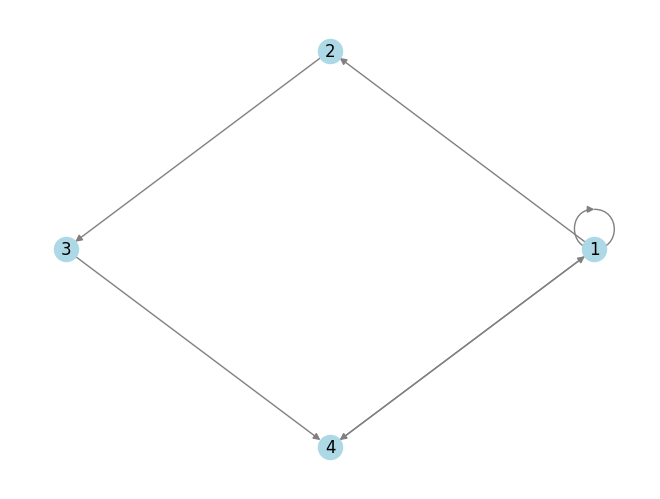

In [ ]:
# Create an empty directed graph
D = nx.DiGraph()

# Add nodes
D.add_nodes_from([1, 2, 3, 4])

# Add directed edges in a single line using a list of tuples
D.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 1), (1, 4), (1, 1)])

# Draw the graph using a circular layout
pos = nx.circular_layout(D)  # Use circular layout for node positioning
nx.draw(D, pos, with_labels=True, node_color='lightblue', edge_color='gray', arrows=True)
plt.show()  # Show the plot

Adding another layer of complexity, we'll introduce edge weights to our directed graph. By assigning random weights between 1 and 10 to each edge, we can visualize and analyze how these weights influence the graph's structure.

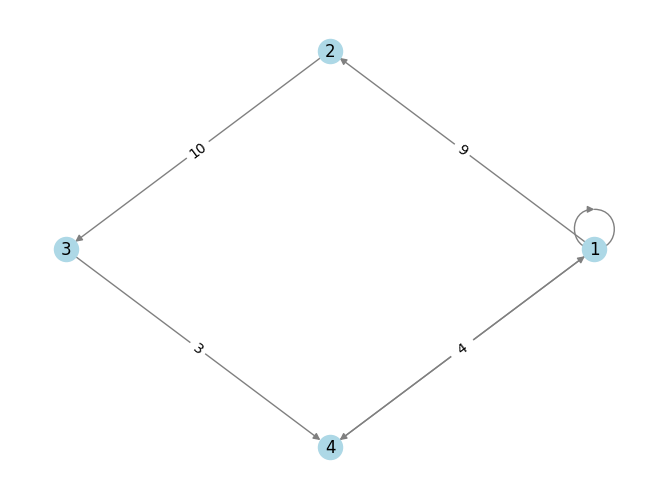

In [ ]:
import random

# Assign a random weight between 1 and 10 to each edge
for (u, v) in D.edges():
    D[u][v]['weight'] = random.randint(1, 10)

# Draw the graph using a circular layout
pos = nx.circular_layout(D)  # Use circular layout for node positioning
nx.draw(D, pos, with_labels=True, node_color='lightblue', edge_color='gray', arrows=True)

# Display edge weights
edge_labels = nx.get_edge_attributes(D, 'weight')
nx.draw_networkx_edge_labels(D, pos, edge_labels=edge_labels)
plt.show()  # Show the plot